In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import when


import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("hotel_bookings_tranformed.csv")

df.head()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,...,arrival_date,hotel_index,meal_index,market_segment_index,distribution_channel_index,reserved_room_type_index,assigned_room_type_index,customer_type_index,total_stays,total_guests
0,0,31,53,0,2,2,0.0,0,PRT,1,...,2016-12-30,1.0,1.0,2.0,1.0,0.0,0.0,1.0,2,2.0
1,0,112,53,0,3,1,0.0,0,PRT,0,...,2015-12-30,1.0,3.0,2.0,1.0,0.0,0.0,1.0,3,1.0
2,0,112,53,0,3,2,0.0,0,PRT,0,...,2015-12-30,1.0,3.0,2.0,1.0,0.0,0.0,1.0,3,2.0
3,0,112,53,0,3,2,0.0,0,PRT,0,...,2015-12-30,1.0,3.0,2.0,1.0,0.0,0.0,1.0,3,2.0
4,0,70,52,2,8,3,0.0,0,PRT,0,...,2015-12-23,1.0,1.0,0.0,0.0,7.0,7.0,0.0,10,3.0


In [3]:
print(df.shape)

(119390, 28)


In [4]:
print(df.isnull().sum())


is_canceled                            0
lead_time                              0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
country                              488
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
adr                                    0
total_of_special_requests              0
arrival_date                           0
hotel_index                            0
meal_index                             0
market_segment_index                   0
distribution_channel_index             0
reserved_room_type_index               0
assigned_room_ty

In [5]:
print(df.describe())

         is_canceled      lead_time  arrival_date_week_number  \
count  119390.000000  119390.000000             119390.000000   
mean        0.370416     104.011416                 27.165173   
std         0.482918     106.863097                 13.605138   
min         0.000000       0.000000                  1.000000   
25%         0.000000      18.000000                 16.000000   
50%         0.000000      69.000000                 28.000000   
75%         1.000000     160.000000                 38.000000   
max         1.000000     737.000000                 53.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       

In [6]:
cancel_rate = df["is_canceled"].mean() * 100
print(f"Average Cancellation Ratio: %{cancel_rate:.2f}")

Average Cancellation Ratio: %37.04


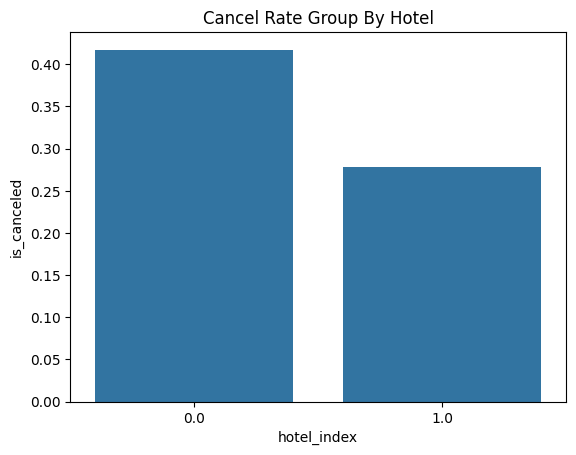

In [7]:
cancel_rate_groupby_hotel = df.groupby("hotel_index")["is_canceled"].mean().reset_index()
sns.barplot(x="hotel_index", y="is_canceled", data = cancel_rate_groupby_hotel)
plt.title("Cancel Rate Group By Hotel")
plt.show()

Average length of stay:  3.4279001591423066


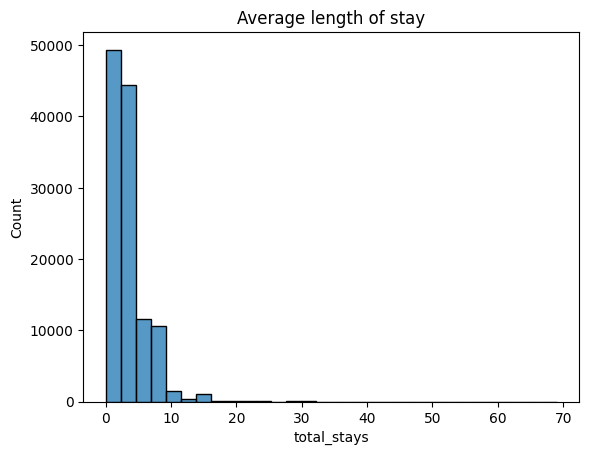

In [8]:
print("Average length of stay: ", df["total_stays"].mean())

sns.histplot(df["total_stays"], bins=30, kde=False)
plt.title("Average length of stay")
plt.show()


country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64


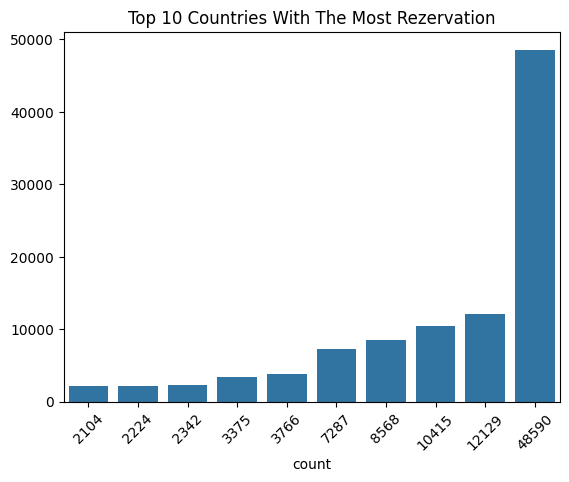

In [9]:
top_countries = df["country"].value_counts().head(10)
print(top_countries)

sns.barplot(x= top_countries, y= top_countries.values)
plt.xticks(rotation = 45)
plt.title("Top 10 Countries With The Most Rezervation")
plt.show()

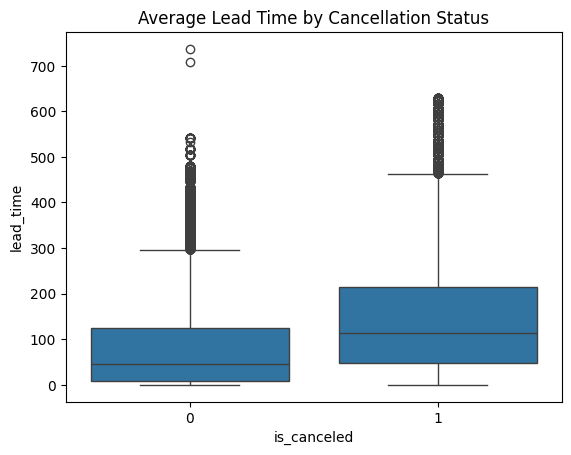

In [10]:
df.groupby("is_canceled")["lead_time"].mean()

sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("Average Lead Time by Cancellation Status")
plt.show()


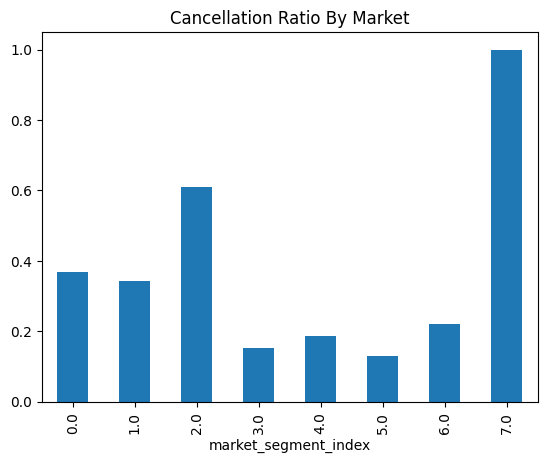

In [11]:
cancel_by_segment = df.groupby("market_segment_index")["is_canceled"].mean()
cancel_by_segment.plot(kind="bar", title="Cancellation Ratio By Market")
plt.show()
